In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Number of records
n = 100

# Generate mock data
data = {
    "driver_id": [f"driver_{i%10}" for i in range(n)],
    "trip_id": [f"trip_{i}" for i in range(n)],
    "hard_brakes": [random.randint(0, 5) for _ in range(n)],
    "sharp_turns": [random.randint(0, 5) for _ in range(n)],
    "speed_limit_exceeded": [random.randint(0, 120) for _ in range(n)],  # Duration in seconds
    "time_in_high_risk_zone": [random.uniform(0.0, 30.0) for _ in range(n)],  # Duration in minutes
    "indicator_usage": [random.randint(0, 20) for _ in range(n)],
    "timestamp": [(datetime.now() - timedelta(days=random.randint(0,30))).strftime('%Y-%m-%d %H:%M:%S') for _ in range(n)]
}

# Convert to dataframe
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("mock_driver_data.csv", index=False)


  driver_id trip_id  hard_brakes  sharp_turns  speed_limit_exceeded  \
0  driver_0  trip_0            1            5                   110   
1  driver_1  trip_1            0            3                   114   
2  driver_2  trip_2            5            1                    63   
3  driver_3  trip_3            3            5                     1   
4  driver_4  trip_4            4            2                    90   

   time_in_high_risk_zone  indicator_usage            timestamp  
0               24.927003                6  2023-10-03 19:19:26  
1               25.002578                2  2023-09-30 19:19:26  
2               29.847641               19  2023-09-30 19:19:26  
3               11.816133               17  2023-09-26 19:19:26  
4               15.624832                3  2023-10-01 19:19:26  

Mean values per driver:
           hard_brakes  sharp_turns  speed_limit_exceeded  \
driver_id                                                   
driver_0           2.1        

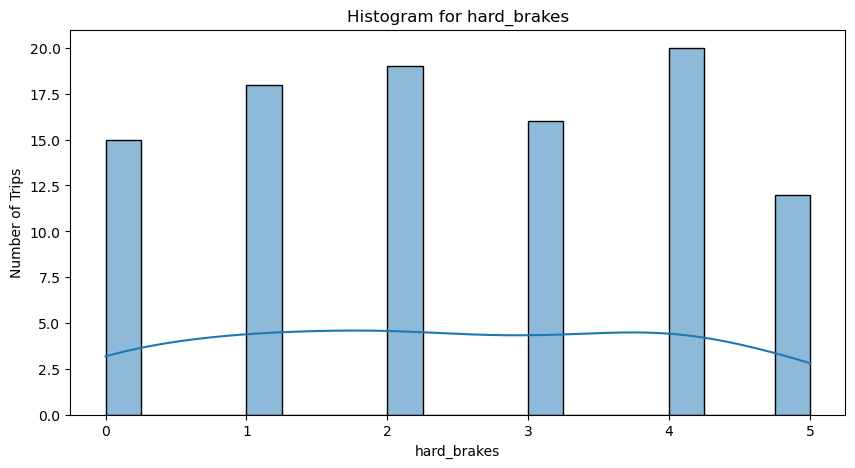

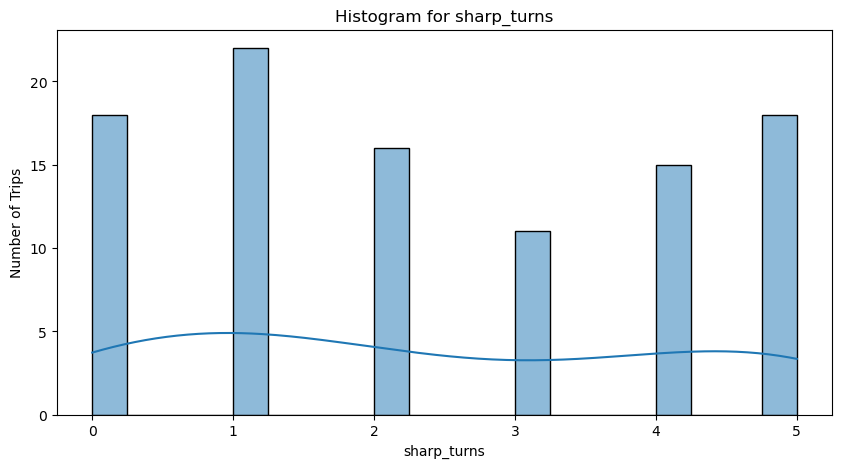

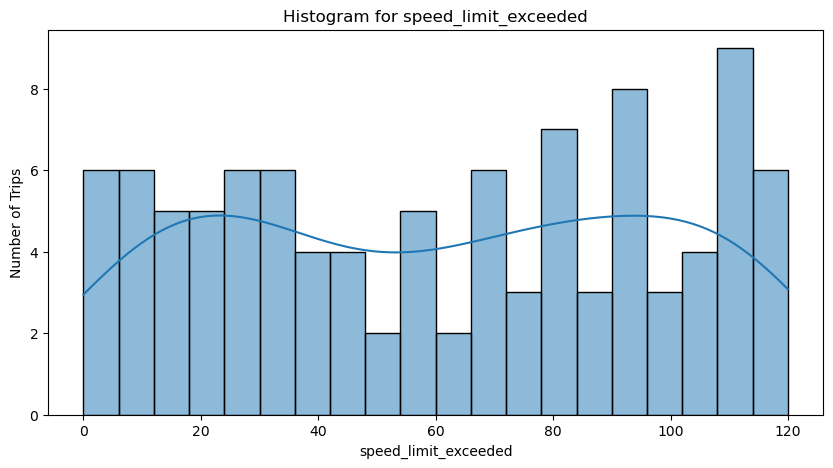

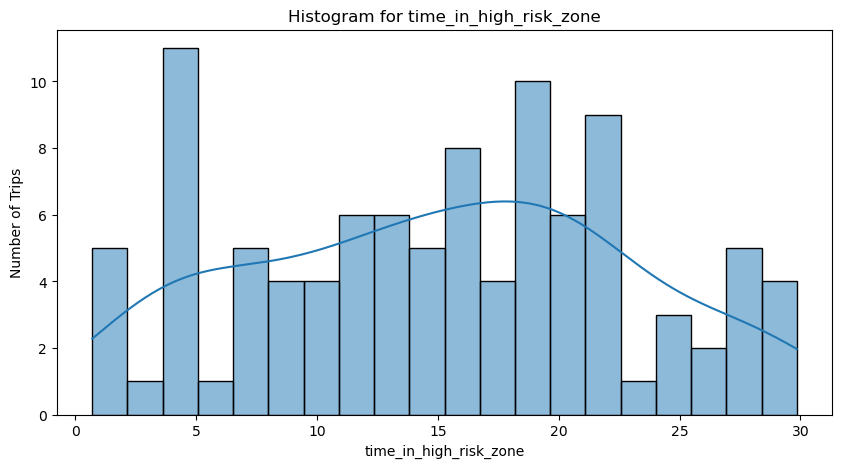

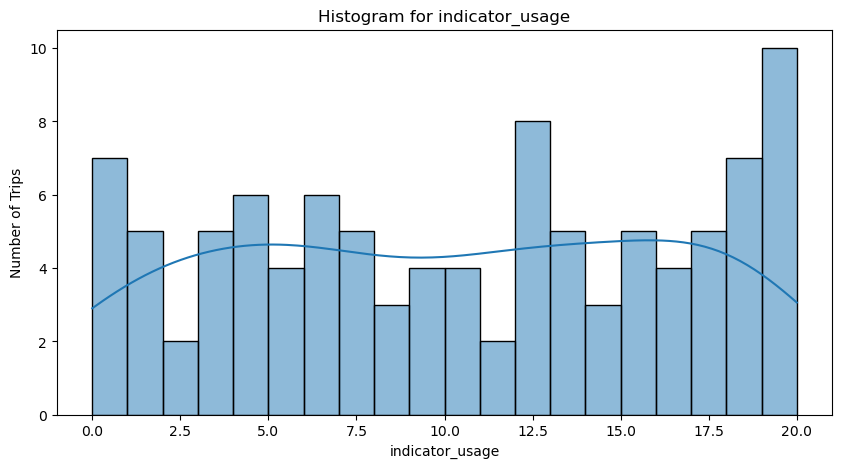

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("mock_driver_data.csv")

# Display the first few rows of the dataframe
print(df.head())

# Basic statistics
print("\nMean values per driver:")
print(df.groupby('driver_id').mean())

print("\nMedian values per driver:")
print(df.groupby('driver_id').median())

print("\nStandard Deviation values per driver:")
print(df.groupby('driver_id').std())

# Visualizations
behaviors = ["hard_brakes", "sharp_turns", "speed_limit_exceeded", "time_in_high_risk_zone", "indicator_usage"]

for behavior in behaviors:
    plt.figure(figsize=(10,5))
    sns.histplot(df[behavior], bins=20, kde=True)
    plt.title(f'Histogram for {behavior}')
    plt.xlabel(behavior)
    plt.ylabel('Number of Trips')
    plt.show()


In [12]:
# Revised Scoring System with milder penalties
def calculate_safety_score(row):
    score = 250  # Start each trip with a base score of 250
    score -= row['hard_brakes'] * 1
    score -= row['sharp_turns'] * 1
    score -= row['speed_limit_exceeded'] * 2
    score -= row['time_in_high_risk_zone'] * 2
    score += row['indicator_usage'] * 3
    
    # Ensure score doesn't drop below 50
    return max(50, score)

# Apply the revised scoring system to the dataframe
df['safety_score'] = df.apply(calculate_safety_score, axis=1)

# Display the updated dataframe with the safety score for each trip
print(df[['trip_id', 'safety_score']].tail())


    trip_id  safety_score
95  trip_95    152.136955
96  trip_96     63.411418
97  trip_97    141.598368
98  trip_98     59.629316
99  trip_99    189.110913


In [13]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df[['hard_brakes', 'sharp_turns', 'speed_limit_exceeded', 'time_in_high_risk_zone', 'indicator_usage']]
y = df['safety_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (R2):', r2_score(y_test, y_pred))


Coefficients: 
 [-1.13444584 -1.37879063 -1.76589142 -1.48864925  2.2130731 ]
Mean Squared Error: 165.52532551202904
Variance score (R2): 0.9561308131403987


In [18]:
df['safety_score_predicted'] = model.predict(df[['hard_brakes', 'sharp_turns', 'speed_limit_exceeded', 'time_in_high_risk_zone', 'indicator_usage']])

In [20]:
ranked_drivers = df[['driver_id', 'safety_score_predicted']].sort_values(by='safety_score_predicted', ascending=False)
print(ranked_drivers.tail())  # Displaying top 5 for brevity

   driver_id  safety_score_predicted
13  driver_3               13.867091
28  driver_8                9.724764
1   driver_1                6.432677
8   driver_8                2.844425
36  driver_6               -4.776969


In [22]:
# Extracting the model coefficients
coefficients = model.coef_
behaviors = ['hard_brakes', 'sharp_turns', 'speed_limit_exceeded', 'time_in_high_risk_zone', 'indicator_usage']

# Displaying the influence of each behavior on the safety score
for behavior, coef in zip(behaviors, coefficients):
    print(f"{behavior}: {coef:.2f}")


hard_brakes: -1.13
sharp_turns: -1.38
speed_limit_exceeded: -1.77
time_in_high_risk_zone: -1.49
indicator_usage: 2.21
